# Sentiment Analysis 
## ML models 
- Logistic Regression 
- Multinomial Naive Bayes
- Random Forest

### Cleaning : Stemming

In [1]:
import spacy
import gensim
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd 
import numpy as np 
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
#nltk.download('stopwords')
#from wordcloud import WordCloud
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
#the dataset is already undergone stemming
df=pd.read_csv(r'C:\Users\liewm\Documents\BT4222 Mining Web Data\Project\text.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head(2)

,Stem_Summary,score
0,only park outside hotel beauti,1
1,no real complaints hotel great great location...,1


In [4]:
import numpy as np
df=df.replace(np.nan, '', regex=True)
df.isnull().any()

Stem_Summary    False
score           False
dtype: bool

## 1. Split dataset 

In [20]:
from sklearn.model_selection import train_test_split
SEED = 1
x=df.Stem_Summary
y=df.score
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=0.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=0.25, random_state=SEED)

## 2. Check which word embedding is better? 
1) Count vectorizer : unigram, bigram, trigram 
<br>2) TFIDF vectorizer with unigram, bigram, trigram 

## 2.1 Logistic Regression


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [22]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [23]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,30000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2)) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3)) #Trigram 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features
null accuracy: 50.22%
accuracy score: 94.14%
model is 43.92% more accurate than null accuracy
train and test time: 35.16s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.22%
accuracy score: 94.16%
model is 43.94% more accurate than null accuracy
train and test time: 39.81s
--------------------------------------------------------------------------------
Validation result for 70000 features
null accuracy: 50.22%
accuracy score: 94.18%
model is 43.96% more accurate than null accuracy
train and test time: 42.46s
----------------------------------

In [23]:
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2)) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3)) #Trigram

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features
null accuracy: 50.22%
accuracy score: 93.88%
model is 43.66% more accurate than null accuracy
train and test time: 50.94s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.22%
accuracy score: 93.90%
model is 43.68% more accurate than null accuracy
train and test time: 80.55s
--------------------------------------------------------------------------------
Validation result for 70000 features
null accuracy: 50.22%
accuracy score: 93.91%
model is 43.69% more accurate than null accuracy
train and test time: 106.47s
---------------------------------

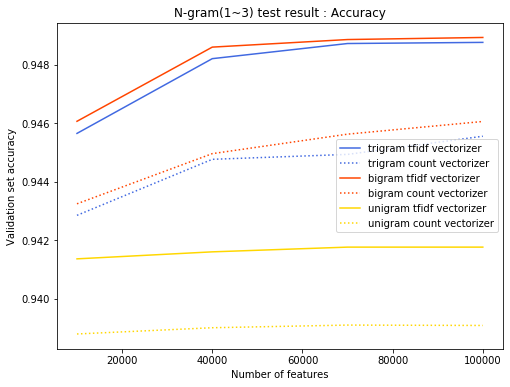

In [24]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### 2.2 Multinomial Naive Bayes 

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec, classifier=nb) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2), classifier=nb) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3), classifier=nb) #Trigram 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 10000 features
null accuracy: 50.22%
accuracy score: 92.79%
model is 42.57% more accurate than null accuracy
train and test time: 19.09s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.22%
accuracy score: 92.85%
model is 42.64% more accurate than null accuracy
train and test time: 13.41s
--------------------------------------------------------------------------------
Validation result for 70000 features
null accuracy: 50.22%
accuracy score: 92.85%
model is 42.63% more accurate than null accuracy
train and test time: 13.98s
--------------------------------------------------------------------------------
Validation result for 100000 features
null accuracy: 50.22%
accuracy score: 92.85%
model is 42.63% more accurate than null accuracy
train and test time: 13.70s
-----------------------------------------------------------

In [26]:
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, classifier=nb) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2), classifier=nb) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3), classifier=nb) #Trigram

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 10000 features
null accuracy: 50.22%
accuracy score: 92.91%
model is 42.69% more accurate than null accuracy
train and test time: 16.28s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.22%
accuracy score: 92.97%
model is 42.75% more accurate than null accuracy
train and test time: 12.88s
--------------------------------------------------------------------------------
Validation result for 70000 features
null accuracy: 50.22%
accuracy score: 92.97%
model is 42.75% more accurate than null accuracy
train and test time: 13.44s
--------------------------------------------------------------------------------
Validation result for 100000 features
null accuracy: 50.22%
accuracy score: 92.97%
model is 42.75% more accurate than null accuracy
train and test time: 12.98s
-----------------------------------------------------------

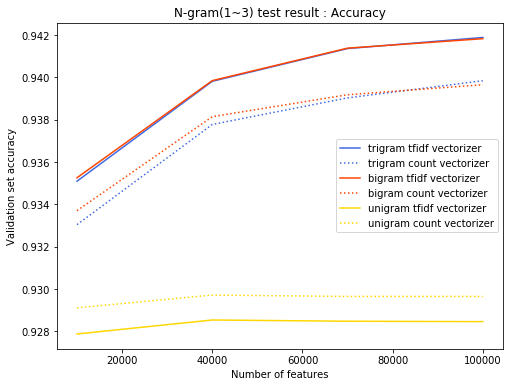

In [27]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

## 2.3 Random Forest Classifier 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
rf=RandomForestClassifier()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec, classifier=rf) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2), classifier=rf) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3), classifier=rf) #Trigram 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.22%
accuracy score: 93.16%
model is 42.95% more accurate than null accuracy
train and test time: 897.29s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.22%
accuracy score: 93.26%
model is 43.05% more accurate than null accuracy
train and test time: 1095.70s
--------------------------------------------------------------------------------
Validation result for

In [25]:
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, classifier=rf) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2), classifier=rf) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3), classifier=rf) #Trigram

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.22%
accuracy score: 93.00%
model is 42.78% more accurate than null accuracy
train and test time: 802.22s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.22%
accuracy score: 93.08%
model is 42.86% more accurate than null accuracy
train and test time: 965.82s
--------------------------------------------------------------------------------
Validation result for 7000

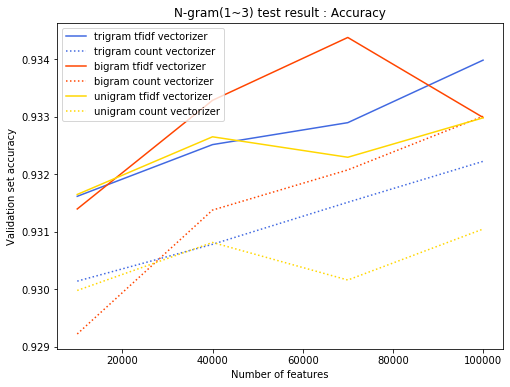

In [26]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

# 3. Preparation for algo
- Split dataset to training and testing dataset 
- Function for tfidf

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
def tfidf(col,ngrams, num):

    df_temp = df.copy(deep = True)
    tfidf_vectorizer = TfidfVectorizer(max_features=num, ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp[col])

    list_corpus = df_temp[col].tolist()
    list_labels = df_temp['score'].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

## 3.1 TF-IDF Details

In [5]:
docs=df.Stem_Summary 
docs

0                             only park outside hotel beauti
1           no real complaints hotel great great location...
2           location good staff ok it cute hotel breakfas...
3           great location nice surroundings bar restaura...
4                     amazing location building romantic set
                                 ...                        
1030419                  trolly staff help take luggage room
1030420                             the hotel looks like sur
1030421       the ac useless it hot week vienna gave hot air
1030422                                               no neg
1030423                            rd floor it work free wif
Name: Stem_Summary, Length: 1030424, dtype: object

In [6]:
#Term Frequency 
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)
word_count_vector.shape

(1030424, 80112)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
room,2.416122
staff,2.537503
the,2.633417
no,2.690008
location,2.844148
...,...
knightsbrege,14.152335
avili,14.152335
knihtsbridge,14.152335
avista,14.152335


In [30]:
df_idf.sort_values(by=['idf_weights'])[80:85]

,idf_weights
made,5.162080
poor,5.181331
easy,5.192573
near,5.197403
around,5.198630


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
tfidf_df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
tfidf_df.sort_values(by=["tfidf"],ascending=False)
 

,tfidf
beauti,0.620160
only,0.470130
park,0.417372
outside,0.416516
hotel,0.216090
...,...
fairtrad,0.000000
fairs,0.000000
fairnont,0.000000
fairness,0.000000


In [16]:
feature_names =  tfidf_vectorizer.get_feature_names()
docs=df.Stem_Summary
corpus_index = [n for n in docs[1:2]]

tfs = tfidf_vectorizer.fit_transform(docs[1:2])
temp = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
print(temp)

                  no real complaints hotel great great location surroundings rooms amenities service two recommendations however firstly staff upon check confusing regarding deposit payments staff offer upon checkout refund original payment make new one bit confusing secondly site restaurant bit lacking well thought excellent quality food anyone vegetarian vegan background even wrap toasted sandwich option would great aside minor minor things fantastic spot back return amsterdam
amenities                                                 0.111803                                                                                                                                                                                                                                                                                                                                                                                                                                 
amsterdam                       

wrap                                                      0.111803                                                                                                                                                                                                                                                                                                                                                                                                                                 


In [17]:
another = pd.DataFrame(tfs.todense(), index=corpus_index, columns=feature_names)

In [18]:
another.iloc[:, 1:10]

,amsterdam,anyone,aside,back,background,bit,check,checkout,complaints
no real complaints hotel great great location surroundings rooms amenities service two recommendations however firstly staff upon check confusing regarding deposit payments staff offer upon checkout refund original payment make new one bit confusing secondly site restaurant bit lacking well thought excellent quality food anyone vegetarian vegan background even wrap toasted sandwich option would great aside minor minor things fantastic spot back return amsterdam,0.111803,0.111803,0.111803,0.111803,0.111803,0.223607,0.111803,0.111803,0.111803


# 4. Models 
## 4.1 Logistic Regression 
- Feature : Bigram tf-idf vectorizer (100,000 features)

## 4.1.1 Top 25 features for positive and negative reviews

In [10]:
#vect = CountVectorizer(min_df=5, ngram_range=(2, 2))
from sklearn.model_selection import GridSearchCV
df_temp = df.copy(deep = True)
vect=TfidfVectorizer(max_features=100000, ngram_range=(1, 2))
vect.fit(df_temp['Stem_Summary'])
list_corpus = df_temp['Stem_Summary'].tolist()
list_labels = df_temp['score'].tolist()
X = vect.transform(list_corpus)
y=list_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)



Vocabulary size: 100000
X_train:
<824339x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 12387740 stored elements in Compressed Sparse Row format>
X_test: 
<206085x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 3110075 stored elements in Compressed Sparse Row format>
Number of features: 100000
Best cross-validation score: 0.95
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


NameError: name 'mglearn' is not defined

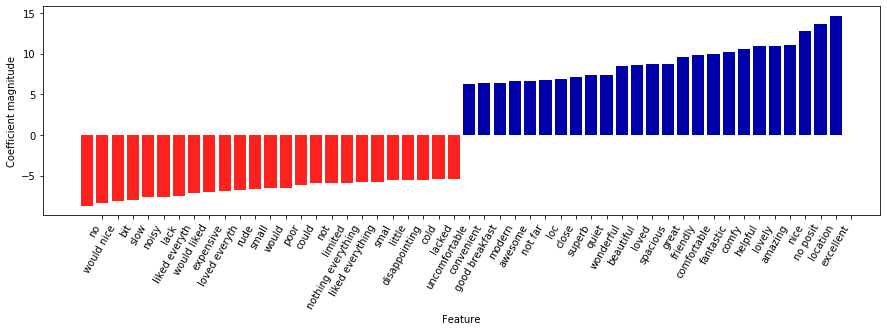

In [11]:
import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=25)
plt.show()


## 4.1.2 Model performance

In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    clf = GridSearchCV(LogisticRegression(), param_grid, cv=5)

    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_test_log, y_pred)
    pres = precision_score(y_test_log, y_pred)
    rec = recall_score(y_test_log, y_pred)
    acc = accuracy_score(y_test_log, y_pred)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_train_log, y_pred_training)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[98267  4477]
 [ 5612 97729]]


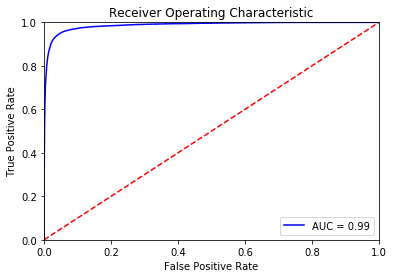

In [10]:
# DataFrame for result evaluation

lr_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 2-gram

X, y = tfidf('Stem_Summary', ngrams = 2, num=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
lr_result = lr_result.append(training_logreg(X_train, X_test, y_train, y_test, 'TF-IDF 2-grams'), ignore_index = True)


In [11]:
lr_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 2-grams,Logistic Regression,0.956196,0.945694,0.950916,0.951044,0.960709


## 4.1.3 LR - Detailed output 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df.Stem_Summary, df.score, test_size=0.2, random_state=40)
vect=TfidfVectorizer(max_features=100000, ngram_range=(1, 2))
X_train_cv = vect.fit_transform(X_train)
X_test_cv = vect.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_cv, y_train)
predictions=clf.predict(X_test_cv)
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('pos')
    else:
        testing_predictions.append('neg')
lr_check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
lr_check_df.replace(to_replace=0, value='neg', inplace=True)
lr_check_df.replace(to_replace=1, value='pos', inplace=True)

In [19]:
lr_check_df[lr_check_df['actual_label']==lr_check_df['prediction']]

,actual_label,prediction,abstract
0,pos,pos,busy popular hotel relaxed quiet good night s...
1,neg,neg,the beds poor two single b
2,neg,neg,the noise think walls thin could heard bathro...
4,pos,pos,staff helpful friendly location perfect purpo...
5,neg,neg,very hard bed difficult find hotel walk left ...
...,...,...,...
206080,neg,neg,noth
206081,neg,neg,very noisy room proper sleep nights wifi room...
206082,pos,pos,hotel location great staff super nice helpful...
206083,pos,pos,we loved mondrian great location room fabulou...


In [18]:
lr_check_df[lr_check_df['actual_label']!=lr_check_df['prediction']]
#lr_check_df.loc[~(lr_check_df['actual_label'] != lr_check_df['prediction'])]

,actual_label,prediction,abstract
3,neg,pos,toast breakfast plenty choos
12,neg,pos,so quiet bor
43,neg,pos,the waitress breakfast unfriendly accommodati...
46,pos,neg,space area quite valu
50,neg,pos,it old furniture good breakfast
...,...,...,...
205945,pos,neg,the price good flat
205955,pos,neg,perfect get ready xmas party around corn
205986,pos,neg,size junior suit
205995,pos,neg,old fashion parisiens


## 4.2 Multinomial Naive Bayes 
- Trigram tfidf vectorizer

## 4.2.1 Model Output

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
params = {}
def training_NB(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, param_grid=params,cv=folds)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_test_log, y_pred)
    pres = precision_score(y_test_log, y_pred)
    rec = recall_score(y_test_log, y_pred)
    acc = accuracy_score(y_test_log, y_pred)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_train_log, y_pred_training)#compare output of x_train with y_train 

   

    res = res.append({'Preprocessing': preproc, 'Model': f'Naive Bayes', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[97122  5622]
 [ 6170 97171]]


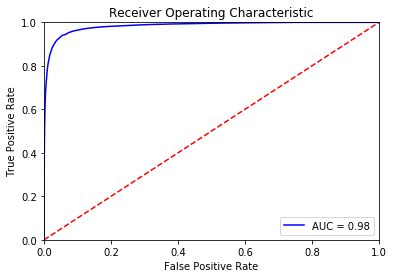

In [13]:
# DataFrame for result evaluation

nb_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 3-gram

X, y = tfidf('Stem_Summary', ngrams = 3, num=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
nb_result = nb_result.append(training_NB(X_train, X_test, y_train, y_test, 'TF-IDF 3-grams'), ignore_index = True)


In [14]:
nb_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 3-grams,Naive Bayes,0.945308,0.940295,0.942794,0.942781,0.945066


## 4.2.2 NB - Detailed output 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Stem_Summary, df.score, test_size=0.2, random_state=40)
vect=TfidfVectorizer(max_features=100000, ngram_range=(1, 3))
X_train_cv = vect.fit_transform(X_train)
X_test_cv = vect.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_cv, y_train)
predictions=clf.predict(X_test_cv)
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('pos')
    else:
        testing_predictions.append('neg')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
check_df.replace(to_replace=0, value='neg', inplace=True)
check_df.replace(to_replace=1, value='pos', inplace=True)

In [20]:
check_df[check_df['actual_label']==check_df['prediction']]

,actual_label,prediction,abstract
0,pos,pos,busy popular hotel relaxed quiet good night s...
1,neg,neg,the beds poor two single b
2,neg,neg,the noise think walls thin could heard bathro...
4,pos,pos,staff helpful friendly location perfect purpo...
5,neg,neg,very hard bed difficult find hotel walk left ...
...,...,...,...
206080,neg,neg,noth
206081,neg,neg,very noisy room proper sleep nights wifi room...
206082,pos,pos,hotel location great staff super nice helpful...
206083,pos,pos,we loved mondrian great location room fabulou...


In [17]:
check_df[check_df['actual_label']!=check_df['prediction']]
#check_df.loc[~(check_df['actual_label'] != check_df['prediction'])]

,actual_label,prediction,abstract
3,neg,pos,toast breakfast plenty choos
12,neg,pos,so quiet bor
17,pos,neg,like room decor
43,neg,pos,the waitress breakfast unfriendly accommodati...
46,pos,neg,space area quite valu
...,...,...,...
205907,pos,neg,room booked correctly booking com double twin...
205913,pos,neg,superior room normal size nice large double b...
205925,pos,neg,complete scam overpriced facilities they near...
205995,pos,neg,old fashion parisiens


## 4.3 Random Forest Classifier
- TFIDF Bigram (70,000 features)

## 4.3.1 Model Output

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
params = {}
def training_RF(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    
    clf = RandomForestClassifier()
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_test_log, y_pred)
    pres = precision_score(y_test_log, y_pred)
    rec = recall_score(y_test_log, y_pred)
    acc = accuracy_score(y_test_log, y_pred)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_train_log, y_pred_training)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Naive Bayes', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[96872  5872]
 [ 7705 95636]]


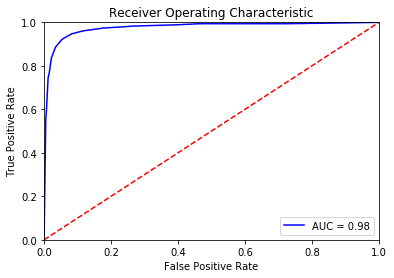

In [7]:
# DataFrame for result evaluation

rf_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

X, y = tfidf('Stem_Summary', ngrams = 2, num=70000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
rf_result = rf_result.append(training_RF(X_train, X_test, y_train, y_test, 'TF-IDF 2-grams'), ignore_index = True)


In [8]:
rf_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 2-grams,Naive Bayes,0.942152,0.925441,0.933722,0.934119,0.983371


## 4.3.2 RF - Detailed output

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.Stem_Summary, df.score, test_size=0.2, random_state=40)
vect=TfidfVectorizer(max_features=70000, ngram_range=(1, 2))
X_train_cv = vect.fit_transform(X_train)
X_test_cv = vect.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train_cv, y_train)
predictions=clf.predict(X_test_cv)
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('pos')
    else:
        testing_predictions.append('neg')
rf_check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
rf_check_df.replace(to_replace=0, value='neg', inplace=True)
rf_check_df.replace(to_replace=1, value='pos', inplace=True)

In [11]:
rf_check_df

,actual_label,prediction,abstract
0,pos,pos,busy popular hotel relaxed quiet good night s...
1,neg,neg,the beds poor two single b
2,neg,neg,the noise think walls thin could heard bathro...
3,neg,neg,toast breakfast plenty choos
4,pos,pos,staff helpful friendly location perfect purpo...
...,...,...,...
206080,neg,neg,noth
206081,neg,neg,very noisy room proper sleep nights wifi room...
206082,pos,pos,hotel location great staff super nice helpful...
206083,pos,pos,we loved mondrian great location room fabulou...


In [16]:
rf_check_df[rf_check_df['actual_label']!=rf_check_df['prediction']]
#rf_check_df.loc[~(rf_check_df['actual_label'] != rf_check_df['prediction'])]

,actual_label,prediction,abstract
12,neg,pos,so quiet bor
43,neg,pos,the waitress breakfast unfriendly accommodati...
46,pos,neg,space area quite valu
50,neg,pos,it old furniture good breakfast
72,neg,pos,the concierge crew extremely help
...,...,...,...
205917,neg,pos,room comfortable fixed got saturday fixed monday
205925,pos,neg,complete scam overpriced facilities they near...
205955,pos,neg,perfect get ready xmas party around corn
205977,pos,neg,where hotel
